# Model Selection
---

## Overfitting

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ThoracicSurgery3.csv', header=None)
print(df)
print(df[16].value_counts())

Mounted at /content/drive
     0     1     2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0     1  2.88  2.16   1   0   0   0   1   1   3   0   0   0   1   0  60   0
1     2  3.40  1.88   0   0   0   0   0   0   1   0   0   0   1   0  51   0
2     2  2.76  2.08   1   0   0   0   1   0   0   0   0   0   1   0  59   0
3     2  3.68  3.04   0   0   0   0   0   0   0   0   0   0   0   0  54   0
4     2  2.44  0.96   2   0   1   0   1   1   0   0   0   0   1   0  73   1
..   ..   ...   ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
465   1  3.88  2.12   1   0   0   0   1   0   2   0   0   0   1   0  63   0
466   2  3.76  3.12   0   0   0   0   0   0   0   0   0   0   1   0  61   0
467   2  3.04  2.08   1   0   0   0   1   0   2   0   0   0   0   0  52   0
468   2  1.96  1.68   1   0   0   0   1   1   1   0   0   0   1   0  79   0
469   2  4.72  3.56   0   0   0   0   0   0   1   0   0   0   1   0  51   0

[470 rows x 17 columns]
16
0    400
1     70
Name: count, dty

In [ ]:
import pandas as pd
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ThoracicSurgery3.csv', header=None)
X = df.iloc[:, 0:16]
y = df.iloc[:, 16]

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 모델 정의
model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

optimizer = Adam(learning_rate=0.0001)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])# 모델 훈련 및 history 객체 저장
history = model.fit(X_train, y_train, epochs=500, batch_size=47, verbose = 0, validation_data=(X_test, y_test))

# 모델 평가
score = model.evaluate(X_test, y_test)
print('Test score:', score[1])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           2,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │           2,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,781 (174.93 KB)

 Trainable params: 44,781 (174.93 KB)

 Non-trainable params: 0 (0.00 B)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8441 - loss: 0.5537  
Test score: 0.8425531983375549


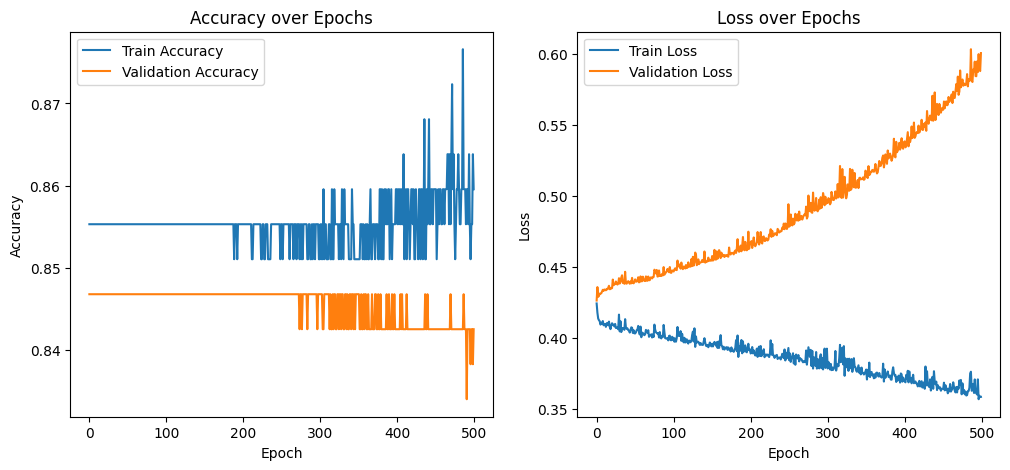

In [ ]:
# 러닝 커브 플롯
plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

##  Model Selection: Classification Example

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wine.csv', header=None)
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        0     1     2    3      4     5      6        7     8     9     10  \
0      7.4  0.70  0.00  1.9  0.076  11.0   34.0  0.99780  3.51  0.56   9.4   
1      7.8  0.88  0.00  2.6  0.098  25.0   67.0  0.99680  3.20  0.68   9.8   
2      7.8  0.76  0.04  2.3  0.092  15.0   54.0  0.99700  3.26  0.65   9.8   
3     11.2  0.28  0.56  1.9  0.075  17.0   60.0  0.99800  3.16  0.58   9.8   
4      7.4  0.70  0.00  1.9  0.076  11.0   34.0  0.99780  3.51  0.56   9.4   
...    ...   ...   ...  ...    ...   ...    ...      ...   ...   ...   ...   
6492   6.2  0.21  0.29  1.6  0.039  24.0   92.0  0.99114  3.27  0.50  11.2   
6493   6.6  0.32  0.36  8.0  0.047  57.0  168.0  0.99490  3.15  0.46   9.6   
6494   6.5  0.24  0.19  1.2  0.041  30.0  111.0  0.99254  2.99  0.46   9.4   
6495   5.5  0.29  0.30  1.1  0.022  20.0  110.0  0.98869  3.34  0.38  12.8   
6496   6.0  0

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wine.csv', header=None)

X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

print(X)
print(y)

Mounted at /content/drive
        0     1     2    3      4     5      6        7     8     9     10  11
0      7.4  0.70  0.00  1.9  0.076  11.0   34.0  0.99780  3.51  0.56   9.4   5
1      7.8  0.88  0.00  2.6  0.098  25.0   67.0  0.99680  3.20  0.68   9.8   5
2      7.8  0.76  0.04  2.3  0.092  15.0   54.0  0.99700  3.26  0.65   9.8   5
3     11.2  0.28  0.56  1.9  0.075  17.0   60.0  0.99800  3.16  0.58   9.8   6
4      7.4  0.70  0.00  1.9  0.076  11.0   34.0  0.99780  3.51  0.56   9.4   5
...    ...   ...   ...  ...    ...   ...    ...      ...   ...   ...   ...  ..
6492   6.2  0.21  0.29  1.6  0.039  24.0   92.0  0.99114  3.27  0.50  11.2   6
6493   6.6  0.32  0.36  8.0  0.047  57.0  168.0  0.99490  3.15  0.46   9.6   5
6494   6.5  0.24  0.19  1.2  0.041  30.0  111.0  0.99254  2.99  0.46   9.4   6
6495   5.5  0.29  0.30  1.1  0.022  20.0  110.0  0.98869  3.34  0.38  12.8   7
6496   6.0  0.21  0.38  0.8  0.020  22.0   98.0  0.98941  3.26  0.32  11.8   6

[6497 rows x 12 columns]


In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wine.csv', header=None)
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

model = Sequential()
model.add(Input(shape = (12,)))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 50, batch_size = 500, validation_split=0.25)
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0], 'Test accuracy:', score[1])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.7614 - loss: 0.5210 - val_accuracy: 0.8654 - val_loss: 0.3569
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8546 - loss: 0.3532 - val_accuracy: 0.8815 - val_loss: 0.3149
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8761 - loss: 0.3136 - val_accuracy: 0.9192 - val_loss: 0.2907
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9259 - loss: 0.2829 - val_accuracy: 0.9254 - val_loss: 0.2679
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9267 - loss: 0.2753 - val_accuracy: 0.9231 - val_loss: 0.2557
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9290 - loss: 0.2498 - val_accuracy: 0.9315 - val_loss: 0.2477
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9270 - loss: 0.2565 - val_accuracy: 0.9285 - val_loss: 0.2378
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9397 - loss: 0.2263 - val_accuracy: 0.9323 - val_loss: 0.2324
Epoch 

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wine.csv', header=None)

X = df.iloc[:, 0:12]
y = df.iloc[:, 12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

# model structure design
model = Sequential()
model.add(Input(shape = (12,)))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

modelpath = '/content/drive/MyDrive/Colab Notebooks/data/model/wine/{epoch:02d}-{val_accuracy:.4f}.keras'
checkpointer = ModelCheckpoint(filepath = modelpath, verbose = 1)

history = model.fit(X_train, y_train, epochs = 50, batch_size = 500, validation_split=0.25, verbose = 0, callbacks = [checkpointer])

score = model.evaluate(X_test, y_test)
print('Test loss:', score[0], 'Test accuracy:', score[1])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/data/model/wine/01-0.8762.keras

Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/data/model/wine/02-0.9038.keras

Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/data/model/wine/03-0.9023.keras

Epoch 4: saving model to /content/drive/MyDrive/Colab Notebooks/data/model/wine/04-0.9169.keras

Epoch 5: saving model to /content/drive/MyDrive/Colab Notebooks/data/model/wine/05-0.9146.keras

Epoch 6: saving model to /content/drive/MyDrive/Colab Notebooks/data/model/wine/06-0.9169.keras

Epoch 7: saving model to /content/drive/MyDrive/Colab Notebooks/data/model/wine/07-0.9200.keras

Epoch 8: saving model to /content/drive/MyDrive/Colab Notebooks/data/model/wine/08-0.9231.keras

Epoch 9: saving model to /content/drive/MyDrive/Colab Notebooks/data/model/wine/09-0.9223.kera

In [ ]:
hist_df = pd.DataFrame(history.history)
print(hist_df)

    accuracy      loss  val_accuracy  val_loss
0   0.813446  0.354805      0.876154  0.320493
1   0.901206  0.305196      0.903846  0.305596
2   0.907365  0.277662      0.902308  0.274888
3   0.913523  0.255767      0.916923  0.253418
4   0.923018  0.239331      0.914615  0.237702
5   0.923788  0.227388      0.916923  0.225853
6   0.923531  0.218530      0.920000  0.219472
7   0.926867  0.212652      0.923077  0.213472
8   0.929433  0.208481      0.922308  0.209137
9   0.930973  0.204461      0.922308  0.206223
10  0.932256  0.201701      0.921538  0.202668
11  0.934308  0.198272      0.923846  0.200167
12  0.935078  0.196054      0.921538  0.197335
13  0.934565  0.193513      0.926923  0.195891
14  0.935335  0.190892      0.926154  0.192749
15  0.935078  0.188448      0.926923  0.190730
16  0.936361  0.185985      0.927692  0.188356
17  0.936875  0.183420      0.930000  0.186393
18  0.938414  0.181248      0.931538  0.183939
19  0.937901  0.179836      0.933846  0.182063
20  0.937901 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.2433 - loss: 20.3007 - val_accuracy: 0.2685 - val_loss: 11.2066
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1976 - loss: 9.0639 - val_accuracy: 0.2608 - val_loss: 1.2790
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5869 - loss: 1.0177 - val_accuracy: 0.7292 - val_loss: 1.3869
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7552 - loss: 1.3638 - val_accuracy: 0.7292 - val_loss: 1.5425
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7581 - loss: 1.4193 - val_accuracy: 0.7292 - val_loss: 1.3256
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7556 - loss: 1.1775 - val_accuracy: 0.7292 - val_loss: 0.8968
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7551 - loss: 0.7798 - val_accuracy: 0.7454 - 

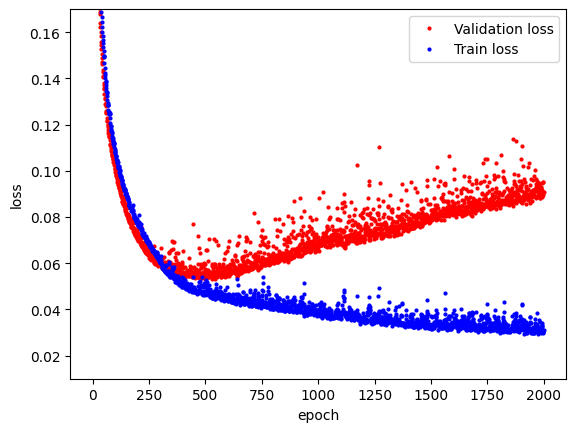

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wine.csv', header=None)

X = df.iloc[:, 0:12]
y = df.iloc[:, 12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

model = Sequential()
model.add(Input(shape = (12,)))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split= 0.25)

score = model.evaluate(X_test, y_test)
print('Test loss:', score[0], 'Test accuracy:', score[1])
hist_df = pd.DataFrame(history.history)

y_val_loss = hist_df['val_loss']
y_train_loss = hist_df['loss']

x_len = np.arange(len(y_train_loss))
plt.plot(x_len, y_val_loss, 'o', c = 'red', markersize = 2, label = 'Validation loss')
plt.plot(x_len, y_train_loss, 'o', c = 'blue', markersize = 2, label = 'Train loss')

plt.legend(loc = 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0.01, 0.17])
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.4402 - loss: 2.1426 - val_accuracy: 0.7315 - val_loss: 1.7551
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7644 - loss: 1.4489 - val_accuracy: 0.7315 - val_loss: 1.4026
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7398 - loss: 1.1359 - val_accuracy: 0.6662 - val_loss: 0.9309
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6545 - loss: 0.8581 - val_accuracy: 0.7015 - val_loss: 0.7297
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7229 - loss: 0.6193 - val_accuracy: 0.7308 - val_loss: 0.6051
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7510 - loss: 0.4909 - val_accuracy: 0.7708 - val_loss: 0.4950
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8046 - loss: 0.4173 - val_accuracy: 0.8331 

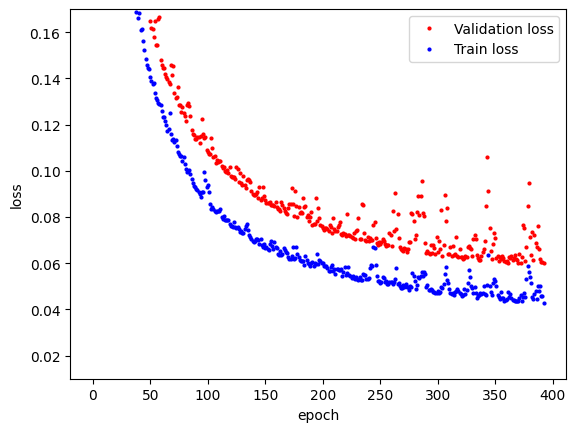

In [ ]:
from google.colab import drive
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wine.csv', header=None)

X = df.iloc[:, 0:12]
y = df.iloc[:, 12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

model = Sequential()
model.add(Input(shape = (12,)))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

modelpath = '/content/drive/MyDrive/Colab Notebooks/data/model/wine/best_wine_model.keras'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose=0, save_best_only = True)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split=0.25, verbose = 1, callbacks = [early_stopping_callback, checkpointer])

score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0], 'Test accuracy: ', score[1])

hist_df = pd.DataFrame(history.history)

y_val_loss = hist_df['val_loss']
y_train_loss = hist_df['loss']

x_len = np.arange(len(y_train_loss))
plt.plot(x_len, y_val_loss, 'o', c = 'red', markersize = 2, label = 'Validation loss')
plt.plot(x_len, y_train_loss, 'o', c = 'blue', markersize = 2, label = 'Train loss')

plt.legend(loc = 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0.01, 0.17])
plt.show()

## Model Selection: Regression Example

In [ ]:
import pandas as pd
import google.colab.drive as drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/house_train.csv')
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
14

In [11]:
import pandas as pd
import google.colab.drive as drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/house_train.csv')
#print(df.head())
#print(df)
print(df.dtypes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [12]:
import pandas as pd
import google.colab.drive as drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/house_train.csv')
#df.isna()
df.isna().sum().sort_values(ascending = False).head(15)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageYrBlt,81


In [13]:
import pandas as pd
import google.colab.drive as drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/house_train.csv')
#df.isna()
df.isna().sum().sort_values(ascending = False).head(15)
df = pd.get_dummies(df)
df = df.fillna(df.mean())
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

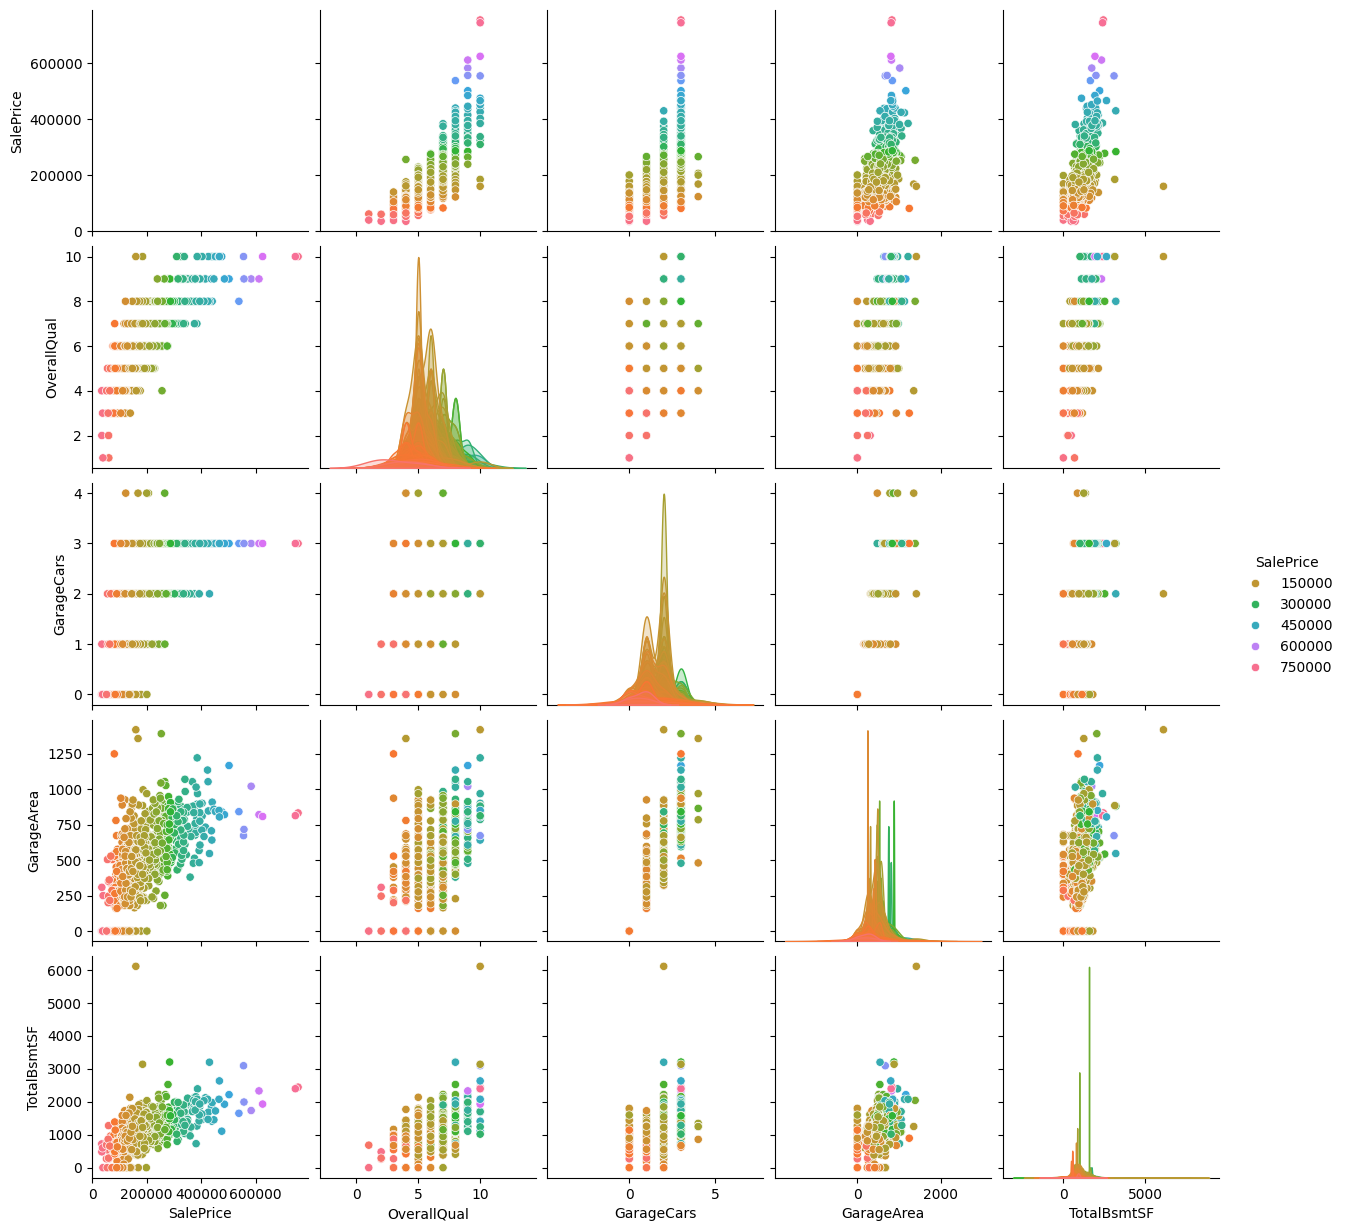

In [14]:
import pandas as pd
import google.colab.drive as drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/house_train.csv')
df.isna()
df = pd.get_dummies(df)
df = df.fillna(df.mean())

df_corr = df.corr()
df_corr_sort = df_corr.sort_values('SalePrice', ascending = False)
df_corr_sort['SalePrice'].head(10)

cols = ['SalePrice', 'OverallQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
sns.pairplot(data = df, vars = cols, hue = 'SalePrice', palette = 'husl')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,661 (6.49 KB)

 Trainable params: 1,661 (6.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 37784334336.0000 - mse: 37784334336.0000 - val_loss: 38621429760.0000 - val_mse: 38621429760.0000
Epoch 2/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35738578944.0000 - mse: 35738578944.0000 - val_loss: 38075670528.0000 - val_mse: 38075670528.0000
Epoch 3/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36350418944.0000 - mse: 36350418944.0000 - val_loss: 36803440640.0000 - val_mse: 36803440640.0000
Epoch 4/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35303407616.0000 - mse: 35303407616.0000 - val_loss: 33652150272.0000 - val_mse: 33652150272.0000
Epoch 5/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29755549696.0000 - mse: 29755549696.0000 - val_loss: 26869538816.0000 - val_mse: 26869538816.0000
Epoch 6/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23462330368.0000 - mse: 23462330368.0000 - val_loss: 16515369984.0000 - val_mse: 16515369984.0000
Epoch 7/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

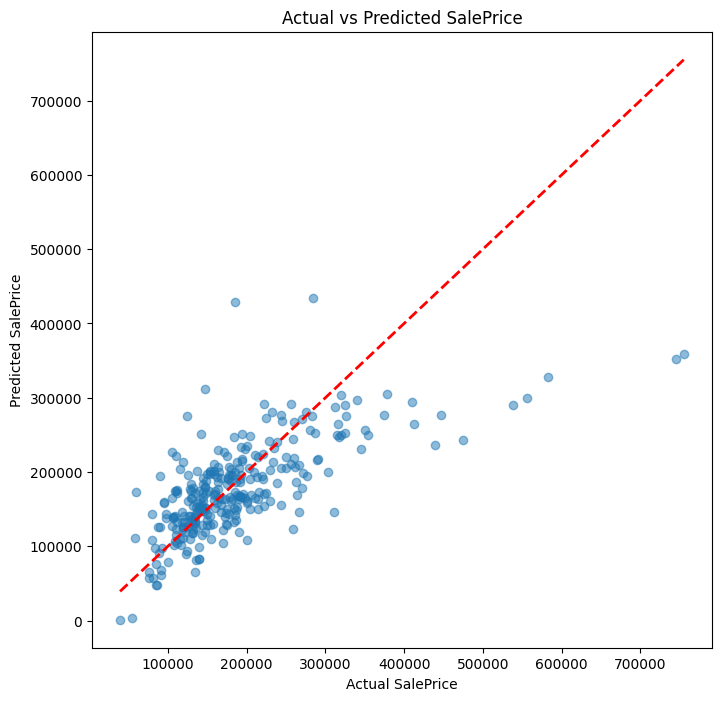

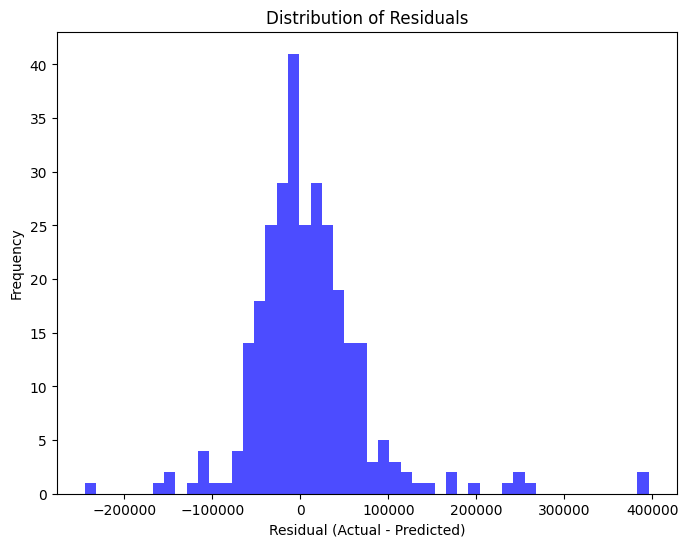

In [15]:
import google.colab.drive as drive
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/house_train.csv')

# 결측치 확인 및 대체
print(df.isna().sum()) # 결측치 개수 확인
df = pd.get_dummies(df) # 카테고리형 변수를 원-핫 인코딩
df = df.fillna(df.mean()) # 결측치는 평균으로 대체

# 상관관계 분석 및 상위 10개 속성 확인
df_corr = df.corr()
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
print(df_corr_sort['SalePrice'].head(10)) # SalePrice와 가장 상관관계가 높은 10개 변수 출력

# 학습용 데이터 구성
cols_train = ['OverallQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
X_train_pre = df[cols_train]
y = df['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

# 모델 구성
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
modelpath = '/content/drive/MyDrive/Colab Notebooks/data/model/best_house_model.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, epochs=2000, batch_size=32,
validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

# 테스트 데이터로 모델 평가
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_mse:.4f}")

# 테스트 데이터를 사용한 예측
y_pred = model.predict(X_test)

# 실제 값과 예측 값 비교
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

# 실제 값과 예측 값의 차이 시각화
plt.figure(figsize=(8, 6))
plt.hist(y_test - y_pred.flatten(), bins=50, alpha=0.7, color='blue')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()